# SfN poster viewer data explore

1. Histogram of number of people at each poster.
    a. separate by poster session
2. Count of withdrawals and no-shows for each poster session

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from tools.plt import scatt_corr, unpair_2cond, scatt_2cond

import seaborn as sns
sns.set_style('white')

import pandas as pd

# 1. Import data and preprocess

In [91]:
filename_data = 'C:/gh/data/sfn/posters_people.csv'
df_raw = pd.DataFrame.from_csv(filename_data,index_col=False)

In [113]:
# Separate dfs into withdrawn, empty, and present
key_S = 'Session'
key_P = 'Poster number'
key_N = 'Number of people'
key_T = 'Minutes since 1pm'
df_withdraw = df_raw[df_raw[key_N] =='W']
df_empty = df_raw[df_raw[key_N] =='99']
df_count = df_raw[df_raw[key_N] !='99']
df_count = df_count[df_count[key_N] !='W']
df_count[key_N] = df_count[key_N].astype(int)

In [126]:
# Separate dfs into multiple groups
dfs_grouped = {}
obj_grouped = df_count.groupby('Session')
ks_Session = obj_grouped.groups.keys()
for k in ks_Session:
    dfs_grouped[k] = obj_grouped.get_group(k)

# 1b. Histogram of viewers

In [205]:
len(df_count[df_count[key_N]==2])

1044

([<matplotlib.axis.XTick at 0x1f87a5f8>,
 <a list of 11 Text xticklabel objects>)

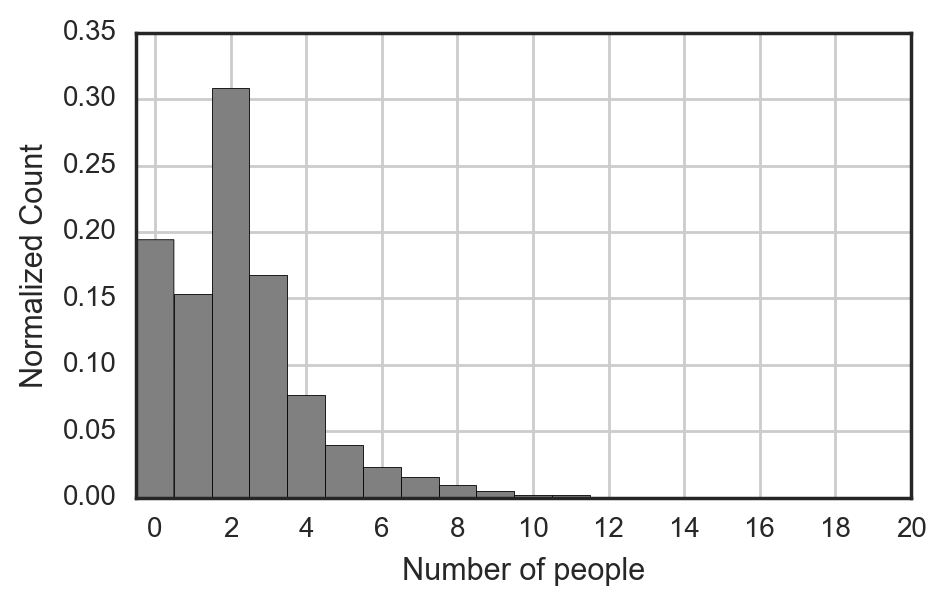

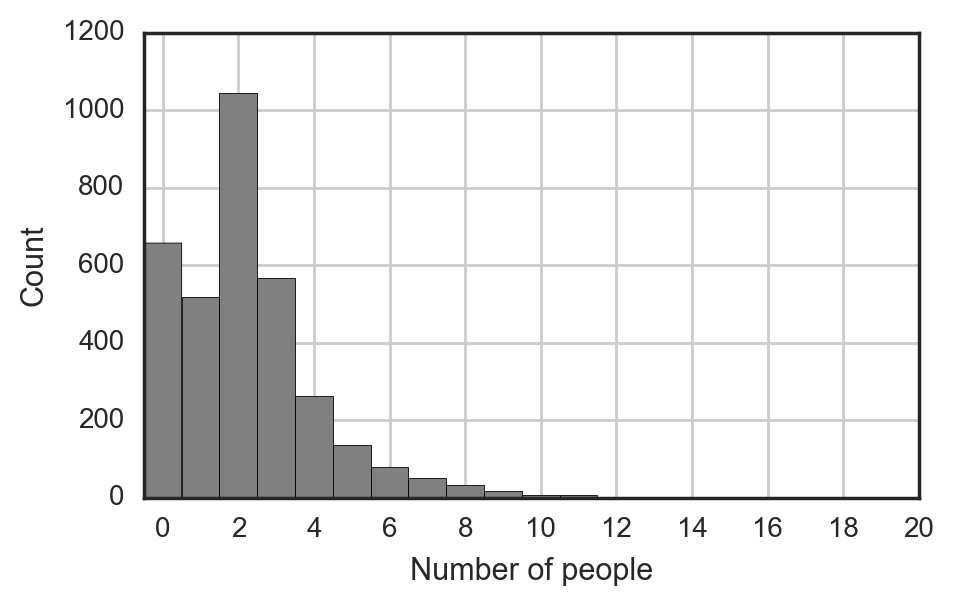

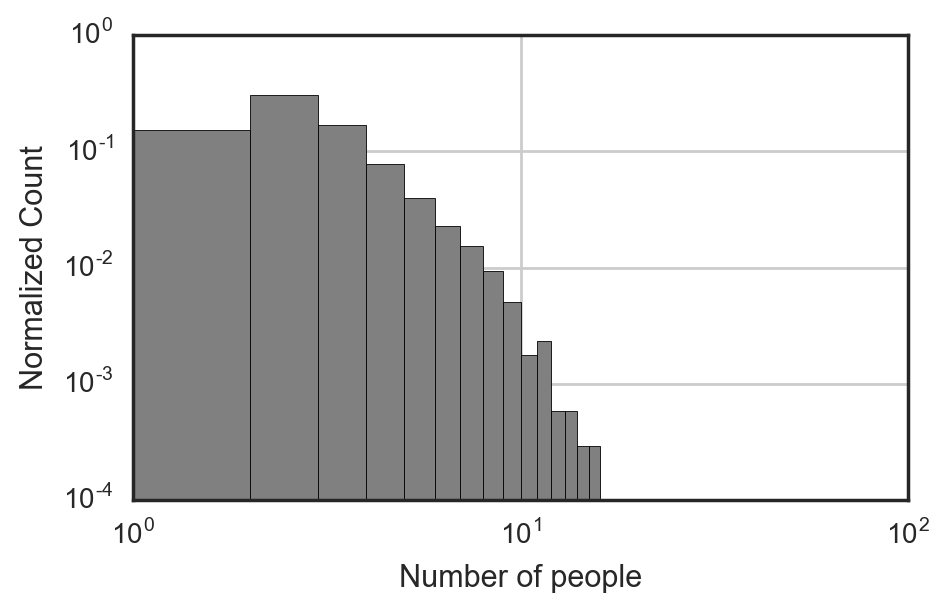

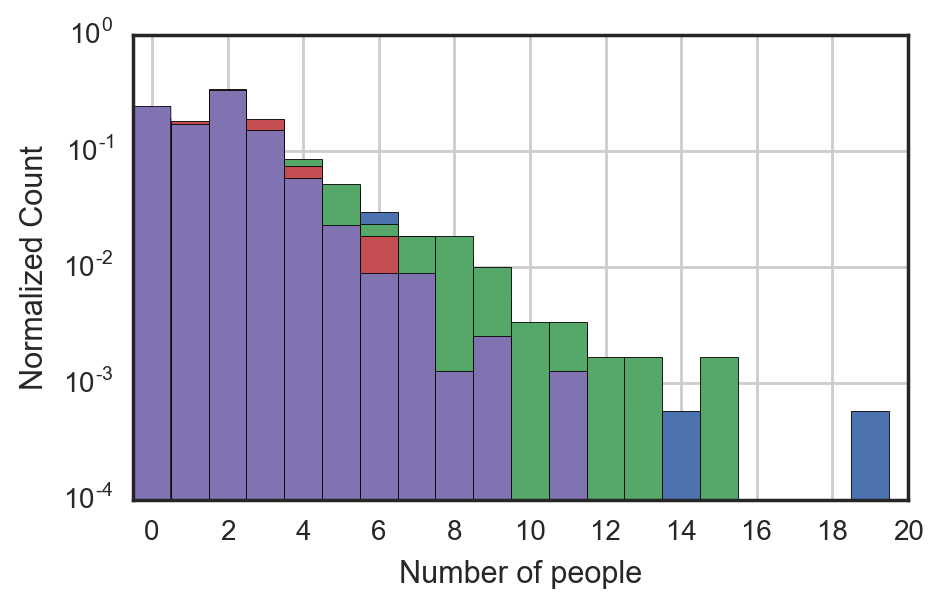

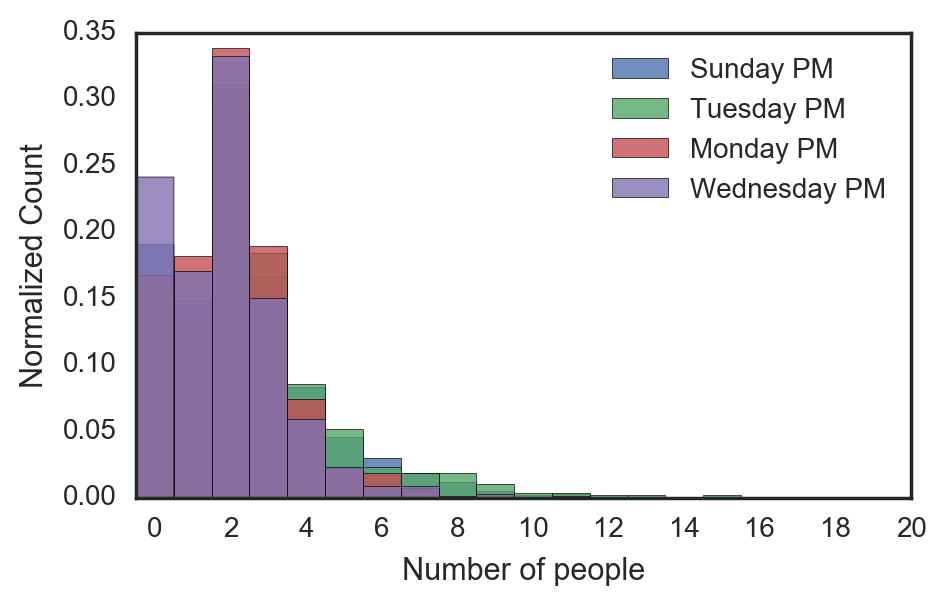

In [211]:
# Hist1: All days
plt.figure(figsize=(5,3))
df_count.hist(key_N,bins=range(21),ax=plt.gca(),normed=True,color='.5')
plt.xlabel('Number of people')
plt.ylabel('Normalized Count')
plt.title('')
plt.xticks(np.arange(0.5,21.5,2),np.arange(0,21,2))

plt.figure(figsize=(5,3))
df_count.hist(key_N,bins=range(21),ax=plt.gca(),color='.5')
plt.xlabel('Number of people')
plt.ylabel('Count')
plt.title('')
plt.xticks(np.arange(0.5,21.5,2),np.arange(0,21,2))

# Hist2: Log
plt.figure(figsize=(5,3))
df_count.hist(key_N,bins=range(20),ax=plt.gca(),normed=True,color='.5')
plt.xlabel('Number of people')
plt.ylabel('Normalized Count')
plt.title('')
ax = plt.gca()
ax.set_yscale("log")
ax.set_xscale("log")

# Hist3: Separate all days
plt.figure(figsize=(5,3))
bins = np.arange(0,21,2)
for k, df in zip(dfs_grouped.keys(), dfs_grouped.values()):
    df.hist(key_N,bins=range(21),ax=plt.gca(),normed=True)

ax = plt.gca()
ax.set_yscale("log")
plt.legend(loc='best')
plt.xlabel('Number of people')
plt.ylabel('Normalized Count')
plt.title('')
plt.xticks(np.arange(0.5,21.5,2),np.arange(0,21,2))


# Hist4: Separate all days log
plt.figure(figsize=(5,3))
bins = range(20)
for k, df in zip(dfs_grouped.keys(), dfs_grouped.values()):
    vals = df[key_N].values
    plt.hist(vals,bins=bins,alpha=.8,label=k,normed=True)

plt.legend(loc='best')
plt.xlabel('Number of people')
plt.ylabel('Normalized Count')
plt.xticks(np.arange(0.5,21.5,2),np.arange(0,21,2))

# 2. Create df for analyzing Wednesday repeats

In [197]:
# Only focus on Wednesday PM
df_repeats = dfs_grouped['Wednesday PM']

# Find poster numbers that occur at least 5 times
obj_grouped = df_repeats.groupby(key_P)
ks = obj_grouped.aggregate(pd.DataFrame.count)['Session'].keys()
vs = obj_grouped.aggregate(pd.DataFrame.count)['Session'].values
posters_remove = [k for k,v in zip(ks,vs) if v < 5]

# Remove posters with less than 5 entries
for p in posters_remove:
    df_repeats = df_repeats[df_repeats[key_P]!=p]
posters_rep = df_repeats[key_P].unique()
df_repeats = df_repeats.drop(key_S,1)
df_repeats = df_repeats.reset_index()
df_repeats = df_repeats.drop('index',1)

In [11]:
df[df.Session=='Sunday PM'][df['Number of people']!='99'][df['Number of people']!='w']

C:\Users\Scott\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Session,Poster number,Number of people,Minutes since 1pm
1,Sunday PM,A2,0,0.09
3,Sunday PM,A4,2,0.26
5,Sunday PM,A6,4,0.43
6,Sunday PM,A7,1,0.51
8,Sunday PM,A9,2,0.68
9,Sunday PM,A10,0,0.77
10,Sunday PM,A11,0,0.85
12,Sunday PM,A13,1,1.02
13,Sunday PM,B1,0,1.11
15,Sunday PM,B3,2,1.28


# 3. Make plot of poster popularity as a function of row

In [214]:
sess_analyze = 'Sunday PM'
df_pop = df_count[df_count[key_S]==sess_analyze]
df_pop = df_pop.drop('Session',1)
df_pop

,Poster number,Number of people,Minutes since 1pm
1,A2,0,0.09
3,A4,2,0.26
5,A6,4,0.43
6,A7,1,0.51
8,A9,2,0.68
9,A10,0,0.77
10,A11,0,0.85
12,A13,1,1.02
13,B1,0,1.11
15,B3,2,1.28


In [34]:
t = df[df.Session=='Sunday PM'][df['Number of people']!='99'][df['Number of people']!='w'][df['Number of people']!='W']['Minutes since 1pm'].values
y = df[df.Session=='Sunday PM'][df['Number of people']!='99'][df['Number of people']!='w'][df['Number of people']!='W']['Number of people'].values
y = y.astype(int)

C:\Users\Scott\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\Scott\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [43]:
len(sp.signal.medfilt(y,101))

1739

(0, 25)

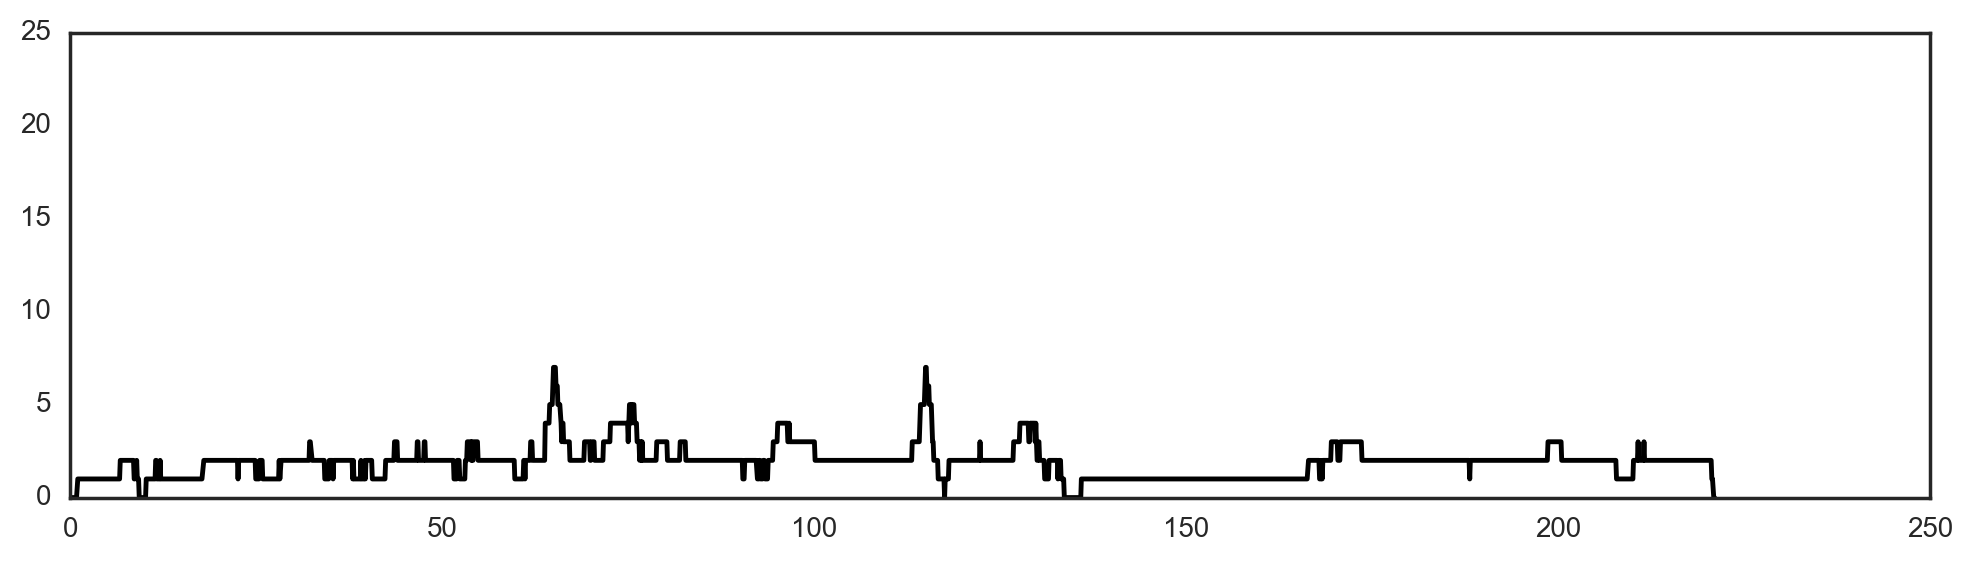

In [45]:
medfilt_size = 21
y2 = sp.signal.medfilt(y,medfilt_size)
plt.figure(figsize=(12,3))
plt.plot(t,y2,'k-')
plt.ylim((0,25))

# 4. Are there more people at ~4pm than ~1pm? (Sunday PM)

In [ ]:
# scatter 2 condition and t-test

# 5. Do popular neighbors bring traffic?

In [ ]:
# Compare correlation between adjacent posters and those that are 2 away